In [5]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

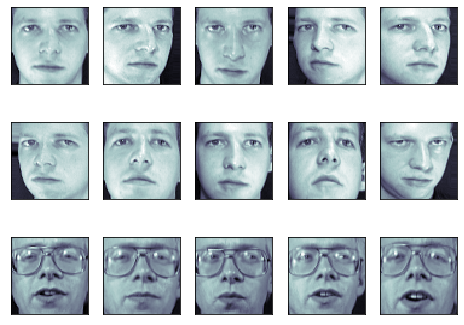

In [6]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [29]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [30]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [31]:
print(X_test_pca.shape)

(100, 150)


In [32]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

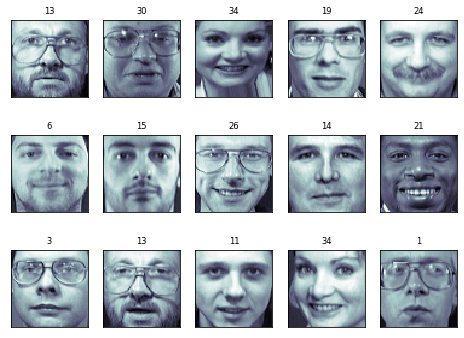

In [33]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [34]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         1
           4       0.25      1.00      0.40         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       0.50    

[Text(148.97455923137878, 212.004, 'X[0] <= 2.029\ngini = 0.974\nsamples = 300\nvalue = [4, 6, 8, 9, 9, 5, 6, 7, 10, 9, 6, 9, 8, 7\n5, 7, 10, 4, 10, 6, 9, 9, 8, 9, 8, 8, 6, 9\n8, 7, 6, 7, 7, 8, 7, 9, 7, 7, 9, 7]'),
 Text(113.02318740095087, 201.132, 'X[13] <= 2.288\ngini = 0.973\nsamples = 282\nvalue = [4, 6, 8, 9, 9, 5, 6, 7, 10, 9, 6, 9, 8, 7\n5, 7, 10, 4, 10, 6, 9, 0, 8, 9, 8, 8, 6, 9\n8, 7, 6, 7, 7, 7, 7, 9, 7, 7, 1, 7]'),
 Text(108.77849643423139, 190.26, 'X[3] <= -0.213\ngini = 0.972\nsamples = 275\nvalue = [4, 6, 8, 9, 9, 5, 6, 7, 10, 9, 6, 9, 8, 7\n5, 7, 10, 4, 10, 6, 9, 0, 8, 9, 8, 8, 6, 2\n8, 7, 6, 7, 7, 7, 7, 9, 7, 7, 1, 7]'),
 Text(41.12044374009509, 179.388, 'X[14] <= -0.516\ngini = 0.934\nsamples = 99\nvalue = [0, 5, 4, 2, 0, 0, 5, 0, 0, 0, 5, 4, 2, 7\n0, 2, 10, 0, 10, 0, 0, 0, 0, 0, 0, 8, 6, 2\n0, 0, 1, 6, 0, 7, 0, 6, 7, 0, 0, 0]'),
 Text(21.223454833597465, 168.516, 'X[24] <= 1.772\ngini = 0.817\nsamples = 38\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 7\n0, 2, 10,

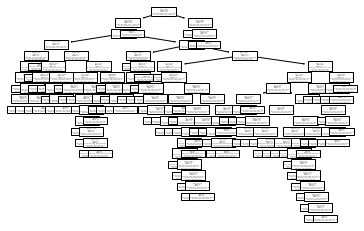

In [35]:
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_pca, y_train)
tree.plot_tree(clf.fit(X_train_pca, y_train)) 

In [36]:
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.67      0.80      0.73         5
           6       1.00      0.25      0.40         4
           7       0.67      0.67      0.67         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       0.75      0.75      0.75         4
          11       0.00      0.00      0.00         1
          12       0.50      0.50      0.50         2
          13       0.75      1.00      0.86         3
          14       0.67      0.80      0.73         5
          15       1.00      0.33      0.50         3
          16       0.00      0.00      0.00         0
          17       0.50    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
